<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Analyzing a Housing Data set | Machine Learning</h2>
<h4>Model used: Regression</h4>
Created by <a href="https://www.linkedin.com/in/linginenivishal/"> Vishal Lingineni </a> <br>
Hult International Business School<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Purpose of this Script</h2><br>
This script is designed to analyze the <a href="https://www.kaggle.com/prevek18/ames-housing-dataset">Ames Housing Dataset</a>, a popular learning dataset from Kaggle.
<br>
<h2>Analytical Objectives</h2><br>
a) Make a prediction for the sale price of each home, which is assumed to be a continuous variable.<br>
b) Identify key features that impact sale price.
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Importing & Exploring the Data  </h2><br>

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output

# specifying file name
file = 'Ames Housing Dataset.xlsx'

# reading the file into Python
housing = pd.read_excel(io=file)

<h3>Initial Data Exploration</h3>

<h4>a) How many observations (i.e. rows) are present in the dataset? How many features (i.e. columns)?</h4><br>

In [2]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {housing.shape[0]}
Features:     {housing.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 2930
Features:     22



<h4>b) Display general information about each variable, including types and the number of non-missing values.</h4>

In [3]:
# INFOrmation about each variable
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
Order            2930 non-null int64
Lot_Area         2930 non-null int64
Street           2930 non-null object
Lot_Config       2930 non-null object
Neighborhood     2930 non-null object
Overall_Qual     2930 non-null int64
Overall_Cond     2930 non-null int64
Mas_Vnr_Area     2907 non-null float64
Total_Bsmt_SF    2929 non-null float64
First_Flr_SF     2930 non-null int64
Second_Flr_SF    2930 non-null int64
Gr_Liv_Area      2930 non-null int64
Full_Bath        2930 non-null int64
Half_Bath        2930 non-null int64
Kitchen_AbvGr    2930 non-null int64
TotRms_AbvGr     2930 non-null int64
Fireplaces       2930 non-null int64
Garage_Cars      2929 non-null float64
Garage_Area      2929 non-null float64
Porch_Area       2930 non-null int64
Pool_Area        2930 non-null int64
Sale_Price       2930 non-null int64
dtypes: float64(4), int64(15), object(3)
memory usage: 503.7+ KB


It appears that the dataset contains a mix of data types. Let's analyze this in more detail as it will effect our approach to developing a machine learning model for predicting sale prices ( Sale_Price ). 

<h3>Analyzing the Distribution of Sale Prices</h3><br>
Notice how the Y-variable ( <em>Sale_Price</em> ) is encoded as an integer as it does not contain decimal places. This is very common in real estate pricing, but it is a slight violation of continuity. Although this informs us that our modeling results will be flawed, we must keep in mind that statistics and real-world applications are expected to have such misalignment. As a result, <strong>we do not expect our predictions to be perfect, but we do expect to develop a general understanding as to what features affect the sale price of a house in Ames, Iowa</strong>.<br><br>

<h4>c) Develop a histogram to analyze the distribution of the Y-variable.</h4><br>
Does it look as if this variable is normally distributed? Does it appear to be skewed positive or negative?

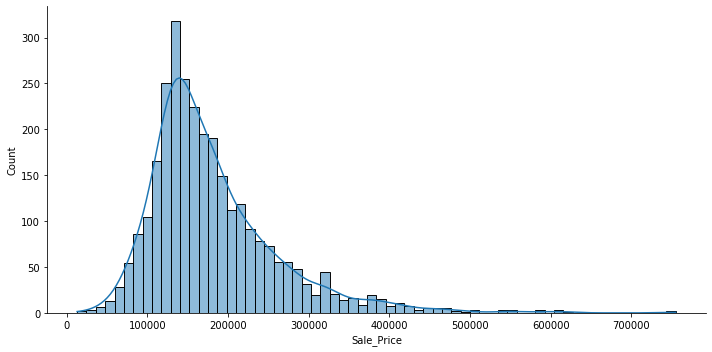

In [4]:
# using the updated version of distplot which is displot
sns.displot(data   = housing,
            x      = "Sale_Price",
            height = 5,
            aspect = 2,
           kde=True)
plt.show()

Using this figure we can see that the <strong>data is aligned with the real world data</strong>, for example most of the homes are in 200,000 range than 800000 which is true. <br>
This is a normal distribution but it is positively skewed <br>
Lets transform this variable and see if it removes the skewness

<h4>d) Develop a histogram to analyze the distribution of the transformed Y-variable.</h4><br>

In [5]:
# log transforming Sale_Price and saving it to the dataset
housing['log_Sale_Price'] = np.log10(housing['Sale_Price'])

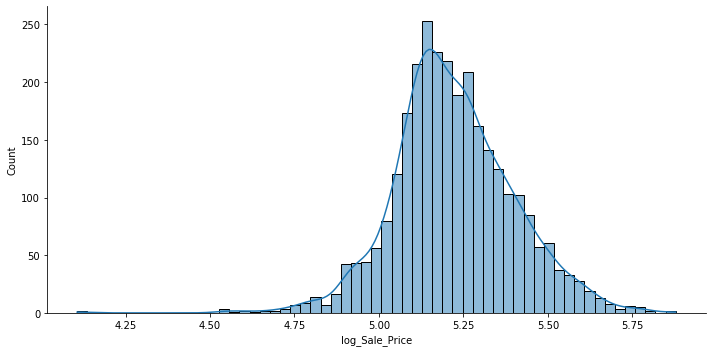

In [6]:
sns.displot(data=housing,x='log_Sale_Price',
            height = 5,
            aspect = 2,
           kde=True)
plt.show()

As we can see the log values are <strong>more normally distributed and less skewed</strong> compared to the original values<br>

In the previous step, we confirmed that <em>Sale_Price</em> is continuous. Thus, we can approach our predictive modeling challenge with a linear modeling technique. Traditionally, linear models rely on the assumption that all of the variables in our model are continuous. Given this, let's use descriptive statistics to identify X-variables that meet this assumption.<br>
<h4>e) Generate descriptive statistics for each quantitative column.</h4><br>

In [7]:
housing.describe(include = "number").round(2)

,Order,Lot_Area,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Garage_Area,Porch_Area,Pool_Area,Sale_Price,log_Sale_Price
count,2930.00,2930.00,2930.00,2930.00,2907.00,2929.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2929.00,2929.00,2930.00,2930.00,2930.00,2930.00
mean,1465.50,10147.92,6.09,5.56,101.90,1051.61,1159.56,335.46,1499.69,1.57,0.38,1.04,6.44,0.60,1.77,472.82,182.89,2.24,180796.06,5.22
std,845.96,7880.02,1.41,1.11,179.11,440.62,391.89,428.40,505.51,0.55,0.50,0.21,1.57,0.65,0.76,215.05,159.83,35.60,79886.69,0.18
min,1.00,1300.00,1.00,1.00,0.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,12789.00,4.11
25%,733.25,7440.25,5.00,5.00,0.00,793.00,876.25,0.00,1126.00,1.00,0.00,1.00,5.00,0.00,1.00,320.00,48.00,0.00,129500.00,5.11
50%,1465.50,9436.50,6.00,5.00,0.00,990.00,1084.00,0.00,1442.00,2.00,0.00,1.00,6.00,1.00,2.00,480.00,165.00,0.00,160000.00,5.20
75%,2197.75,11555.25,7.00,6.00,164.00,1302.00,1384.00,703.75,1742.75,2.00,1.00,1.00,7.00,1.00,2.00,576.00,266.00,0.00,213500.00,5.33
max,2930.00,215245.00,10.00,9.00,1600.00,6110.00,5095.00,2065.00,5642.00,4.00,2.00,3.00,15.00,4.00,5.00,1488.00,1424.00,800.00,755000.00,5.88


<h4>f) identify the data type of each original variable in the dataset basing on the above output.</h4><br>
Use the following groupings:

* CONTINUOUS
* INTERVAL/COUNT
* CATEGORICAL

In [22]:
print("""CONTINUOUS
----------
Sale_Price (Y-variable)
Lot_Area
Mas_Vnr_Area
Total_Bsmt_SF
First_Flr_SF
Second_Flr_SF
Gr_Liv_Area
Garage_Area
Porch_Area
Pool_Area


INTERVAL/COUNT
--------------
Overall_Qual
Overall_Cond
Full_Bath
Half_Bath
Kitchen_AbvGr
TotRms_AbvGr
Fireplaces
Grarage Cars


CATEGORICAL
-----------
Street
Lot Config
Neighborhood
Order (not to be used in modeling) """)

CONTINUOUS
----------
Sale_Price (Y-variable)
Lot_Area
Mas_Vnr_Area
Total_Bsmt_SF
First_Flr_SF
Second_Flr_SF
Gr_Liv_Area
Garage_Area
Porch_Area
Pool_Area


INTERVAL/COUNT
--------------
Overall_Qual
Overall_Cond
Full_Bath
Half_Bath
Kitchen_AbvGr
TotRms_AbvGr
Fireplaces
Grarage Cars


CATEGORICAL
-----------
Street
Lot Config
Neighborhood
Order (not to be used in modeling) 


<h2>Part II: Handling Missing Values  </h2><br>

<h4>a) Display the number of missing values in the dataset.</h4>

In [8]:
# taking the housing dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column

housing.isnull().sum(axis=0)

Order              0
Lot_Area           0
Street             0
Lot_Config         0
Neighborhood       0
Overall_Qual       0
Overall_Cond       0
Mas_Vnr_Area      23
Total_Bsmt_SF      1
First_Flr_SF       0
Second_Flr_SF      0
Gr_Liv_Area        0
Full_Bath          0
Half_Bath          0
Kitchen_AbvGr      0
TotRms_AbvGr       0
Fireplaces         0
Garage_Cars        1
Garage_Area        1
Porch_Area         0
Pool_Area          0
Sale_Price         0
log_Sale_Price     0
dtype: int64

<h4>b) flagging the missing values.</h4><br>

In [9]:
# looping to detect features with missing values
for col in housing:

    # creating columns with 1s if missing and 0 if not
    if housing[col].isnull().astype(int).sum() > 0:
        housing['m_'+col] = housing[col].isnull().astype(int) # flagging them

In [10]:
# summing the missing value flags to check the results of the loop above
housing[    ['m_Mas_Vnr_Area', 'm_Total_Bsmt_SF',
             'm_Garage_Cars', 'm_Garage_Area']    ].sum(axis = 0)

m_Mas_Vnr_Area     23
m_Total_Bsmt_SF     1
m_Garage_Cars       1
m_Garage_Area       1
dtype: int64

<h3>Imputation Strategy</h3><br>
Regression model cannot handle missing values, hence we need to find appropriate imputation strategy for the above variables

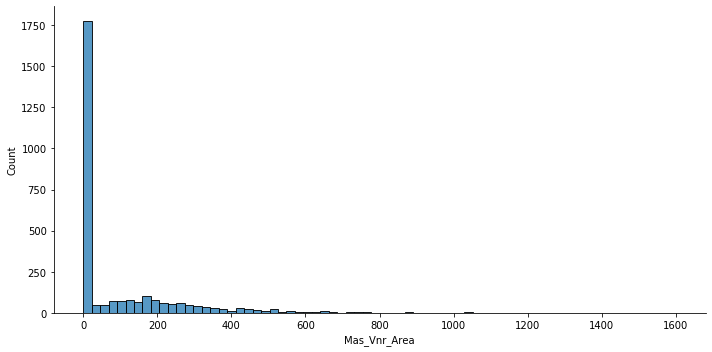

In [11]:
# creating a dropped dataset to visualize 'Mas Vnr Area'
df_dropped = housing.dropna()

# displaying the plot for 'Mas Vnr Area'
sns.displot(data   = df_dropped,
            x      = 'Mas_Vnr_Area',
            height = 5,
            aspect = 2)
plt.show()


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>c) What would be an appropriate imputation value ?</h4>

From the above scatter plots we can see that <strong> Mas Vnr Area distribution is zero inflated.</strong> Thus we can assume that missing values can be interpreted as a feature not being present.<br> 
Thus we will use same strategy to impute all the missing values with zero. 
For example, if total basement square footage ( <em>Total_Bsmt_SF</em> ) is missing for a given house, we will assume that there is no basement and impute it with zero. <br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>d) Impute all missing values in the dataset with zero for their respective columns.</h4>

In [12]:
# imputing everything with the zero

# MAs_Vnr_Area
# instantiating an imputation value
fill = 0

# imputing 'Mas Vnr Area'
housing['Mas_Vnr_Area'] = housing['Mas_Vnr_Area'].fillna(fill) 
#imputing missing value with 0 by thinking that we forgot to record it as there is no MAs_Vnr_Area

# Total_Bsmt_SF
fill = 0
housing['Total_Bsmt_SF'] = housing['Total_Bsmt_SF'].fillna(fill)


# Garage_Cars
fill = 0
housing['Garage_Cars'] = housing['Garage_Cars'].fillna(fill)


# Garage_Area
fill = 0
housing['Garage_Area'] = housing['Garage_Area'].fillna(fill)

In [13]:
# Checking if there are any missing values in columns
housing.isnull().any(axis=0) #orhousing.isnull().any().any()

Order              False
Lot_Area           False
Street             False
Lot_Config         False
Neighborhood       False
Overall_Qual       False
Overall_Cond       False
Mas_Vnr_Area       False
Total_Bsmt_SF      False
First_Flr_SF       False
Second_Flr_SF      False
Gr_Liv_Area        False
Full_Bath          False
Half_Bath          False
Kitchen_AbvGr      False
TotRms_AbvGr       False
Fireplaces         False
Garage_Cars        False
Garage_Area        False
Porch_Area         False
Pool_Area          False
Sale_Price         False
log_Sale_Price     False
m_Mas_Vnr_Area     False
m_Total_Bsmt_SF    False
m_Garage_Cars      False
m_Garage_Area      False
dtype: bool

<h2>Part III: Feature Engineering </h2><br>

<h3>Working with Continuous Data</h3><br>

<h4>Trend Based Features</h4><br>
Our goal here is to identify where a variable's trend changes in terms of its relationship with what we are trying to predict (in this case, the price of a home in Ames, Iowa). In other words, if we analyze a scatter plot and discover that the trend between two variables is not consistent, we can capture this information in the same manner as developing outlier flags. Such a practice may help in improving our predictions, as well as in generating insights.

Let's look at some scatter plots between our continuous X-variables and Sale_Price.

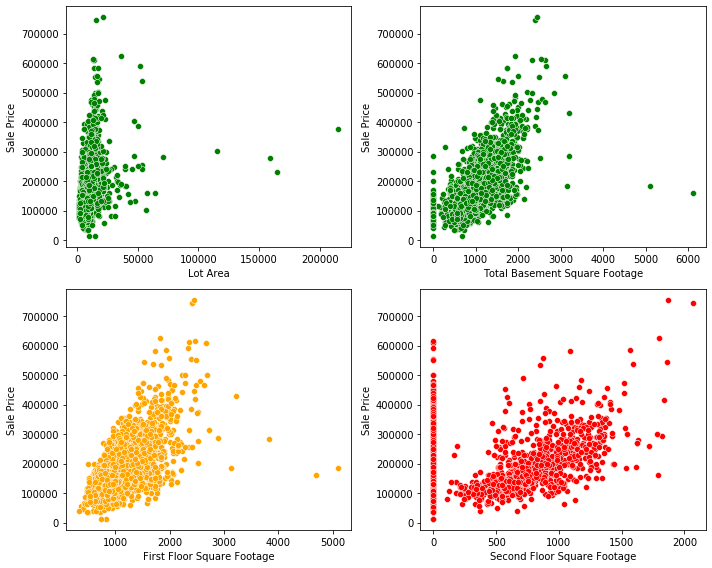

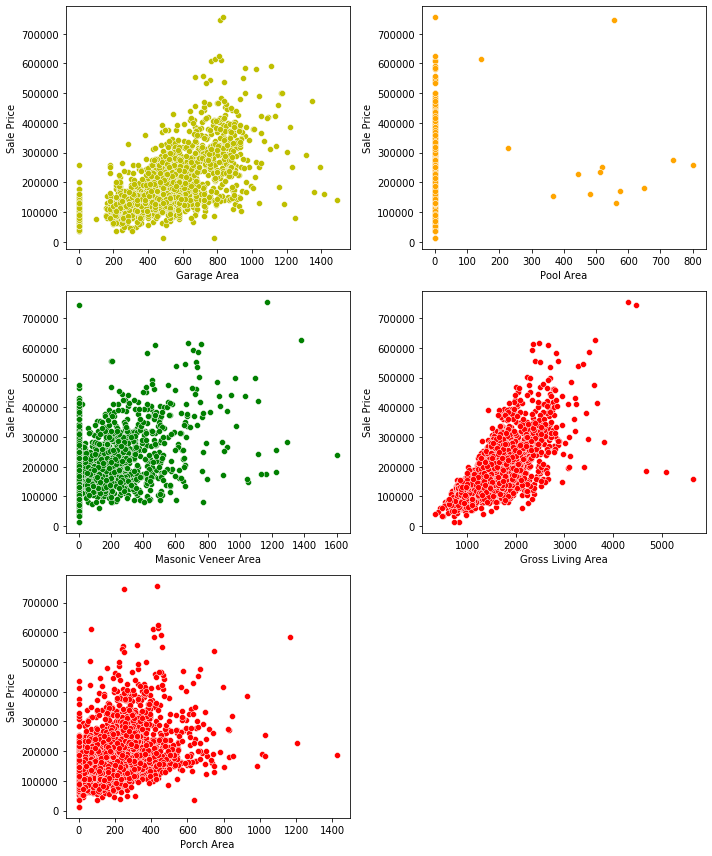

In [14]:
########################################################
# Visual EDA (Scatterplots) for all Continous Variables
########################################################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = housing['Lot_Area'],
                y = housing['Sale_Price'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Lot Area')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = housing['Total_Bsmt_SF'],
                y = housing['Sale_Price'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Basement Square Footage')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = housing['First_Flr_SF'],
                y = housing['Sale_Price'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'First Floor Square Footage')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = housing['Second_Flr_SF'],
                y = housing['Sale_Price'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Second Floor Square Footage')
plt.ylabel(ylabel = 'Sale Price')


########################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('Housing Scatterplots 1 of 2.png')
plt.show()

########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = housing['Garage_Area'],
                y = housing['Sale_Price'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Garage Area')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = housing['Pool_Area'],
                y = housing['Sale_Price'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Pool Area')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = housing['Mas_Vnr_Area'],
                y = housing['Sale_Price'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Masonic Veneer Area')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = housing['Gr_Liv_Area'],
                y = housing['Sale_Price'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Gross Living Area')
plt.ylabel(ylabel = 'Sale Price')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = housing['Porch_Area'],
                y = housing['Sale_Price'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Porch Area')
plt.ylabel(ylabel = 'Sale Price')



# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('Housing Scatterplots 2 of 2.png')
plt.show()



Plot area and Lot area is not much use to us <br>
Gross living area and first floor are perfectly linear and are not zeros inflated hence we are not using them as well

<strong>Basic Rule for Flag-Based Feature Engineering</strong>

* At least 100 observations must be on both sides of the flag (1s and 0s)

In [15]:
# counting the number of zeroes
bsmt_zeroes   = len(housing['Total_Bsmt_SF'][housing['Total_Bsmt_SF'] == 0])
sf_zeroes     = len(housing['Second_Flr_SF'][housing['Second_Flr_SF'] == 0])
garage_zeroes = len(housing['Garage_Area'][housing['Garage_Area'] == 0])
pool_zeroes   = len(housing['Pool_Area'][housing['Pool_Area'] == 0])
mas_zeroes    = len(housing['Mas_Vnr_Area'][housing['Mas_Vnr_Area'] == 0])
porch_zeroes  = len(housing['Porch_Area'][housing['Porch_Area'] == 0])


## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Basement       | {bsmt_zeroes}\t\t{len(housing) - bsmt_zeroes}
Second Floor   | {sf_zeroes}\t\t{len(housing) - sf_zeroes}
Garage         | {garage_zeroes}\t\t{len(housing) - garage_zeroes}
Pool           | {pool_zeroes}\t\t{len(housing) - pool_zeroes}
Masonic Veneer | {mas_zeroes}\t\t{len(housing) - mas_zeroes}
Porch          | {porch_zeroes}\t\t{len(housing) - porch_zeroes}
""")


                 No		Yes
               ---------------------
Basement       | 80		2850
Second Floor   | 1678		1252
Garage         | 158		2772
Pool           | 2917		13
Masonic Veneer | 1771		1159
Porch          | 484		2446



Based on the table above, engineer flag features for all variables that have at least 100 observations in both the 'yes' and 'no' columns.<br>
By doing so we are answering questions like does adding Mas_Vnr_Area to a property will increase the value of home or not? This will add more business value to the model

In [16]:
# dummy variable for having a basement.
housing['has_Basement']   = 0
housing['has_Second_Flr'] = 0
housing['has_Garage']     = 0
housing['has_Mas_Vnr']    = 0
housing['has_Porch']      = 0


for index, value in housing.iterrows():
    
    # Total_Bsmt_SF
    if housing.loc[index, 'Total_Bsmt_SF'] > 0:
        housing.loc[index, 'has_Basement'] = 1


    # Second_Flr_SF
    if housing.loc[index, 'Second_Flr_SF'] > 0:
        housing.loc[index, 'has_Second_Flr'] = 1
        
        
    # Garage_Area
    if housing.loc[index, 'Garage_Area'] > 0:
        housing.loc[index, 'has_Garage'] = 1
        
        
    # Mas_Vnr_Area
    if housing.loc[index, 'Mas_Vnr_Area'] > 0:
        housing.loc[index, 'has_Mas_Vnr'] = 1
        
        
    # Porch_Area
    if housing.loc[index, 'Porch_Area'] > 0:
        housing.loc[index, 'has_Porch'] = 1

In [17]:
housing.isnull().any(axis=0)

Order              False
Lot_Area           False
Street             False
Lot_Config         False
Neighborhood       False
Overall_Qual       False
Overall_Cond       False
Mas_Vnr_Area       False
Total_Bsmt_SF      False
First_Flr_SF       False
Second_Flr_SF      False
Gr_Liv_Area        False
Full_Bath          False
Half_Bath          False
Kitchen_AbvGr      False
TotRms_AbvGr       False
Fireplaces         False
Garage_Cars        False
Garage_Area        False
Porch_Area         False
Pool_Area          False
Sale_Price         False
log_Sale_Price     False
m_Mas_Vnr_Area     False
m_Total_Bsmt_SF    False
m_Garage_Cars      False
m_Garage_Area      False
has_Basement       False
has_Second_Flr     False
has_Garage         False
has_Mas_Vnr        False
has_Porch          False
dtype: bool

In [18]:
# developing a small correlation matrix
zeroes_corr = housing.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['Sale_Price',                                   # Y-variable
               ['has_Basement', 'has_Second_Flr', 'has_Garage', # X-variables
                'has_Mas_Vnr', 'has_Porch']] \
                .sort_values(ascending = False)

has_Mas_Vnr       0.391982
has_Porch         0.256517
has_Garage        0.225840
has_Basement      0.154369
has_Second_Flr    0.089489
Name: Sale_Price, dtype: float64

<h3>Working with Count and Interval Data</h3><br>
Scatter plots can be very confusing when working with interval and count data. Therefore, it is a better practice is to use boxplots when visualizing relationships with such data. Check whether the median line of box plots is following a linear trend otherwise transform those variables

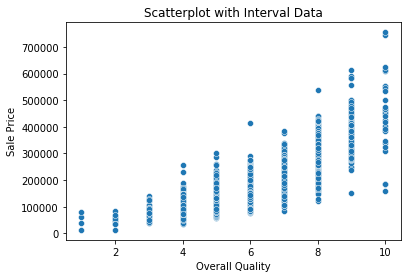

In [19]:
# developing a scatterplot
sns.scatterplot(x    = 'Overall_Qual',
                y    = 'Sale_Price',
                data = housing)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

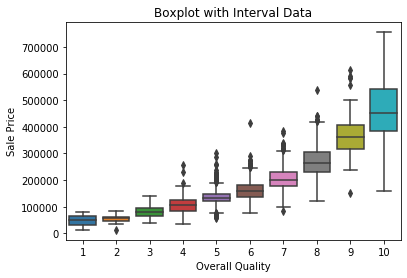

In [20]:
# developing a boxplot
sns.boxplot(x    = 'Overall_Qual',
            y    = 'Sale_Price',
            data = housing)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

We can see that there is slight linear relationship but lets transform it to see whether this linear trend will increase or not

<h4>Transforming the Count and Interval variable </h4>

In [21]:
housing['log_Overall_Qual'] = np.log10(housing['Overall_Qual'])

log_corr = housing.loc[ : , ['Overall_Qual',
                             'log_Overall_Qual',
                             'Sale_Price',
                             'log_Sale_Price']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr.loc[ ['Overall_Qual', 'log_Overall_Qual'],
              ['Sale_Price', 'log_Sale_Price']   ]

,Sale_Price,log_Sale_Price
Overall_Qual,0.80,0.83
log_Overall_Qual,0.74,0.81


As we can see from above the log values are having better correlation value

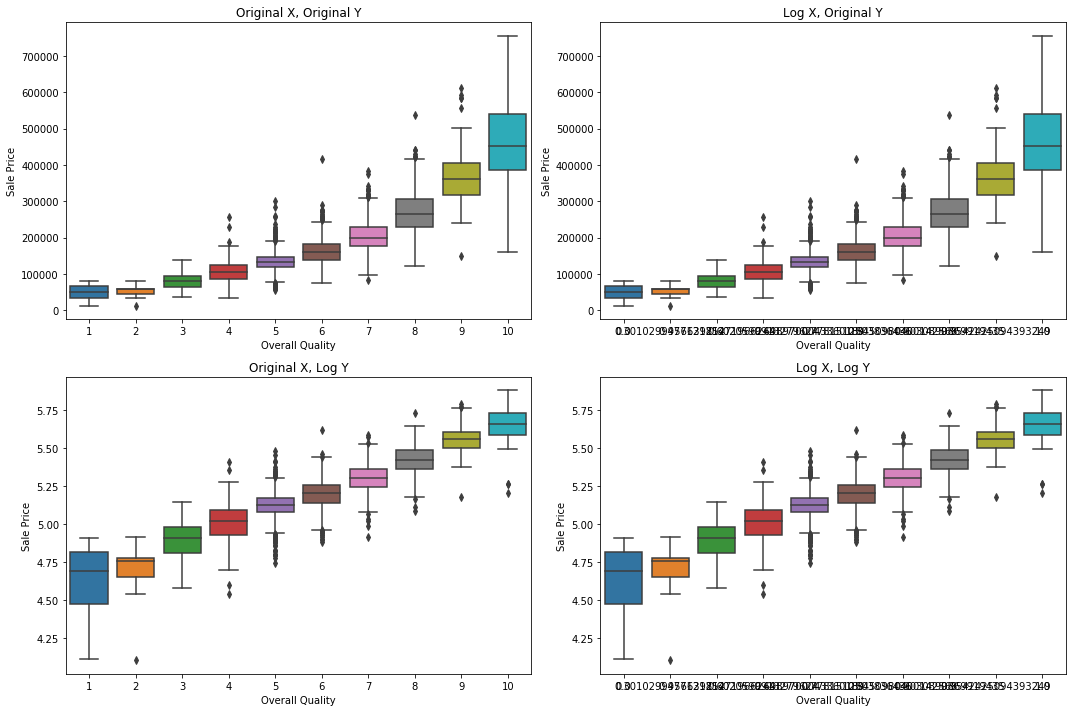

In [22]:
## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'Overall_Qual',
            y     = 'Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_Overall_Qual',
            y     = 'Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'Overall_Qual',
            y     = 'log_Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = np.log10(housing['Overall_Qual']),
            y     = np.log10(housing['Sale_Price']),
            data  = housing)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


## displaying the visuals ##
plt.tight_layout()
plt.show()


Here we can see that the first two box plots doesnt have much of a linear relationship<br>
The third plot is having a strong linear relationship, 4th plot is also having linear relation<br>
From this we can see that Log sales price is having a good relation with Qverall Quantity than the original saleprice values


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Feature Engineering Count and Interval Data</h4>

Let's take a look at the relationship between the number of bathrooms (full baths and half baths) and sale price.

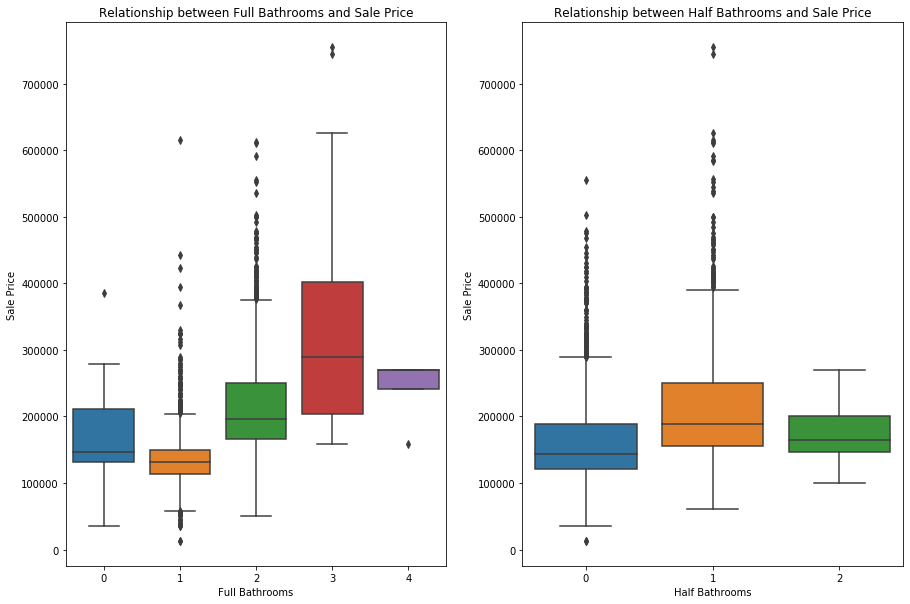


Count of Bathrooms

----------
Full Baths
----------
0      12
1    1318
2    1532
3      64
4       4
Name: Full_Bath, dtype: int64


----------
Half Baths
----------
0    1843
1    1062
2      25
Name: Half_Bath, dtype: int64





In [23]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## full baths ##

# first plot window
plt.subplot(1, 2, 1)

# developing a boxplot
sns.boxplot(x     = 'Full_Bath',
            y     = 'Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Relationship between Full Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Full Bathrooms')
plt.ylabel(ylabel = 'Sale Price')



## half baths ##

# second plot window
plt.subplot(1, 2, 2)


# developing a boxplot
sns.boxplot(x     = 'Half_Bath',
            y     = 'Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Relationship between Half Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Half Bathrooms')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.tight_layout
plt.show()


# printing value counts for full and half baths
print(f"""
Count of Bathrooms
==================

----------
Full Baths
----------
{housing['Full_Bath'].value_counts(normalize = False).sort_index()}


----------
Half Baths
----------
{housing['Half_Bath'].value_counts(normalize = False).sort_index()}


""")

From the above graph we can see that houses with 0 bathrooms have more sales price than houses with 1 bathroom which doesn't make sense. So we dig deep to see what is happening and find that the 0,4 bathrooms data is very less so by ignoring them we can see a linear relation among the other three. Same is true for 2 half bathrooms

<strong>Combining Features</strong><br>
Now, let's engineer a feature that represents total bathrooms using the following calculation:
<br><br>

~~~
Total_Baths = Full_Baths + (Half_Baths / 2)
~~~

<br>we have dvided half bath with 2 because half bath means 0.5 and we want to get it like that

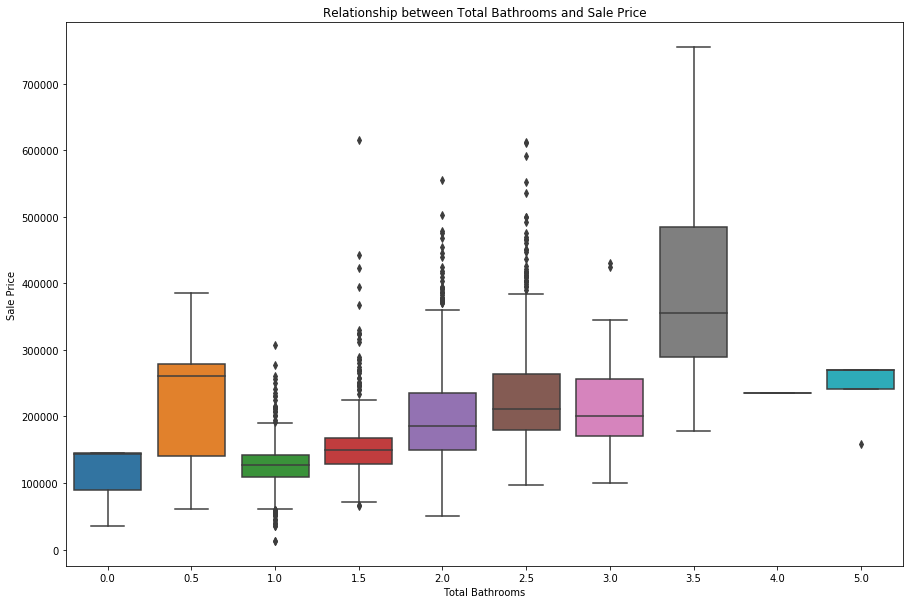


Bathrooms

-----------
Total Baths
-----------
0.0      3
0.5      5
1.0    951
1.5    365
2.0    869
2.5    659
3.0     40
3.5     33
4.0      1
5.0      4
Name: Total_Bath, dtype: int64


---------------------
Bathroom Correlations
---------------------
Full_Bath     0.55
Half_Bath     0.29
Total_Bath    0.58
Sale_Price    1.00
Name: Sale_Price, dtype: float64




In [24]:
# total bathrooms
housing['Total_Bath'] = housing['Full_Bath'] + (housing['Half_Bath'] / 2)


# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'Total_Bath',
            y    = 'Sale_Price',
            data = housing)



# titles and labels
plt.title(label   = 'Relationship between Total Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Total Bathrooms')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.tight_layout
plt.show()


## the following code has been written for you ##

# developing a correlation matrix
bath_corr = housing.loc[ : , ['Full_Bath',
                              'Half_Bath',
                              'Total_Bath',
                              'Sale_Price']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
Bathrooms
=========

-----------
Total Baths
-----------
{housing['Total_Bath'].value_counts(normalize = False).sort_index()}


---------------------
Bathroom Correlations
---------------------
{bath_corr['Sale_Price']}

""")

We can see that this new variable has slightly more correlation than the individual variable

<h3>Working with Categorical Data</h3><br>

In [25]:
# printing columns
print(f"""
Street
------
{housing['Street'].value_counts()}


Lot Config
----------
{housing['Lot_Config'].value_counts()}


Neighborhood
-------------
{housing['Neighborhood'].value_counts()}
""")


Street
------
Pave    2918
Grvl      12
Name: Street, dtype: int64


Lot Config
----------
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot_Config, dtype: int64


Neighborhood
-------------
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64



We need at least 100 values in each category to flag them. so we see Lot config we can categories them in to Inside, Corner and cold Sac. we cannot use FR2 and FR3 as the data points in categories (if we find reasons that FR2 and FR3 are similar to inside lot then we can combine them to inside lot).

<h4>Visualizing Each Category of a variable</h4>

In [26]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()

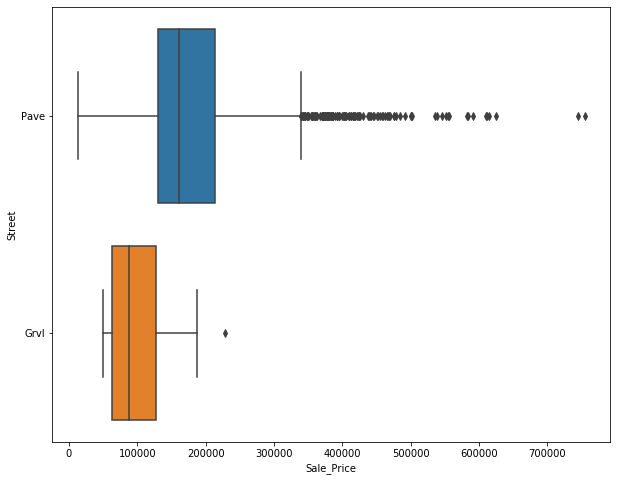

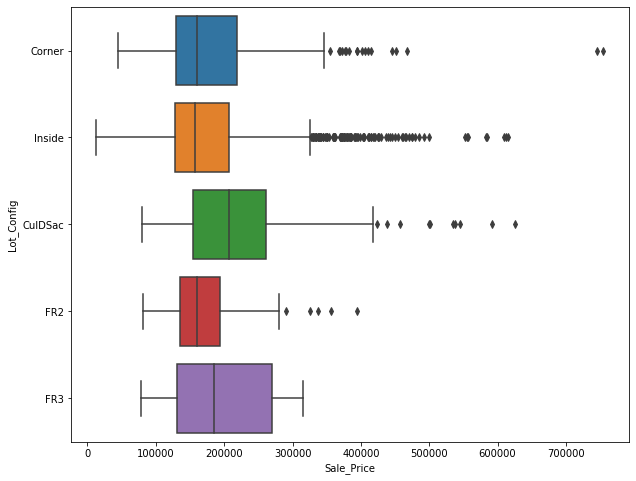

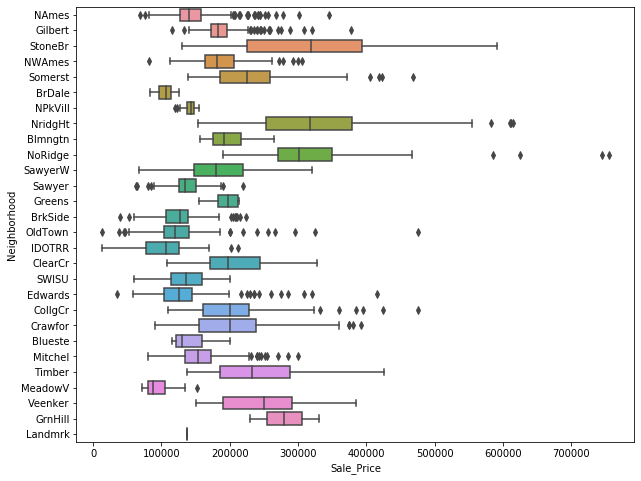

In [27]:
# calling the function for Street
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Street',
					 data     = housing)


# calling the function for Lot_Config
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Lot_Config',
					 data     = housing)


# calling the function for Neighborhood
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Neighborhood',
					 data     = housing)


From this we can see that living in culdsac will cost more compared to corner and insider categories basing on the median value.

<h4>One hot encode each categorical variable using get_dummies</h4>

One hot encoded data : we will take every single column and make each category in to seperate variable. One active category and other categories are zero

In [28]:
# one hot encoding categorical variables
one_hot_Street       = pd.get_dummies(housing['Street'])
one_hot_Lot          = pd.get_dummies(housing['Lot_Config'])
one_hot_Neighborhood = pd.get_dummies(housing['Neighborhood'])


# dropping categorical variables after they've been encoded
housing = housing.drop('Street', axis = 1)
housing = housing.drop('Lot_Config', axis = 1)
housing = housing.drop('Neighborhood', axis = 1)
# deleting the original values as we already categories for them

# joining codings together
housing = housing.join([one_hot_Street, one_hot_Lot, one_hot_Neighborhood])


# saving new columns
new_columns = housing.columns

In [29]:
housing.shape

(2930, 66)

In [30]:
housing.isnull().any(axis=0)

Order           False
Lot_Area        False
Overall_Qual    False
Overall_Cond    False
Mas_Vnr_Area    False
                ...  
SawyerW         False
Somerst         False
StoneBr         False
Timber          False
Veenker         False
Length: 66, dtype: bool

By the end of feature engineering we created 44 new features

<h2>Part IV: Predictive Modeling </h2><br>

In [31]:
# creating a (Pearson) correlation matrix
df_corr = housing.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['Sale_Price'].sort_values(ascending = False))

Sale_Price          1.00
log_Sale_Price      0.95
Overall_Qual        0.80
log_Overall_Qual    0.74
Gr_Liv_Area         0.71
                    ... 
BrkSide            -0.14
Edwards            -0.17
IDOTRR             -0.17
NAmes              -0.19
OldTown            -0.21
Name: Sale_Price, Length: 66, dtype: float64


In [32]:
# creating a (Pearson) correlation matrix
df_corr = housing.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['log_Sale_Price'].sort_values(ascending = False))

log_Sale_Price      1.00
Sale_Price          0.95
Overall_Qual        0.83
log_Overall_Qual    0.81
Gr_Liv_Area         0.70
                    ... 
MeadowV            -0.16
BrkSide            -0.16
Edwards            -0.19
IDOTRR             -0.24
OldTown            -0.25
Name: log_Sale_Price, Length: 66, dtype: float64


In [33]:
# making a copy of housing
housing_explanatory = housing.copy()


# dropping SalePrice and Order from the explanatory variable set
housing_explanatory = housing.drop(['Order',
                                 'Sale_Price',
                                 'log_Sale_Price'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in housing_explanatory:
    print(val,'+')

Lot_Area +
Overall_Qual +
Overall_Cond +
Mas_Vnr_Area +
Total_Bsmt_SF +
First_Flr_SF +
Second_Flr_SF +
Gr_Liv_Area +
Full_Bath +
Half_Bath +
Kitchen_AbvGr +
TotRms_AbvGr +
Fireplaces +
Garage_Cars +
Garage_Area +
Porch_Area +
Pool_Area +
m_Mas_Vnr_Area +
m_Total_Bsmt_SF +
m_Garage_Cars +
m_Garage_Area +
has_Basement +
has_Second_Flr +
has_Garage +
has_Mas_Vnr +
has_Porch +
log_Overall_Qual +
Total_Bath +
Grvl +
Pave +
Corner +
CulDSac +
FR2 +
FR3 +
Inside +
Blmngtn +
Blueste +
BrDale +
BrkSide +
ClearCr +
CollgCr +
Crawfor +
Edwards +
Gilbert +
Greens +
GrnHill +
IDOTRR +
Landmrk +
MeadowV +
Mitchel +
NAmes +
NPkVill +
NWAmes +
NoRidge +
NridgHt +
OldTown +
SWISU +
Sawyer +
SawyerW +
Somerst +
StoneBr +
Timber +
Veenker +


In [36]:
housing_explanatory.shape

(2930, 63)

<h3>Building a Full OLS model using Statsmodels</h3> <br>
Full model is where we throw everything into a model and see how each explanatory variable (i.e. x-variable) performs. This is known as building a full model.

We will use Statsmodel to build our model

In [34]:
import statsmodels.formula.api as smf # regression modeling

In [35]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """Sale_Price ~ Lot_Area +
Overall_Qual +
Overall_Cond +
Mas_Vnr_Area +
Total_Bsmt_SF +
First_Flr_SF +
Second_Flr_SF +
Gr_Liv_Area +
Full_Bath +
Half_Bath +
Kitchen_AbvGr +
TotRms_AbvGr +
Fireplaces +
Garage_Cars +
Garage_Area +
Porch_Area +
Pool_Area +
m_Mas_Vnr_Area +
m_Total_Bsmt_SF +
m_Garage_Cars +
m_Garage_Area +
log_Overall_Qual +
has_Basement +
has_Second_Flr +
has_Garage +
has_Mas_Vnr +
has_Porch +
Total_Bath +
Grvl +
Pave +
Corner +
CulDSac +
FR2 +
FR3 +
Inside +
Blmngtn +
Blueste +
BrDale +
BrkSide +
ClearCr +
CollgCr +
Crawfor +
Edwards +
Gilbert +
Greens +
GrnHill +
IDOTRR +
Landmrk +
MeadowV +
Mitchel +
NAmes +
NPkVill +
NWAmes +
NoRidge +
NridgHt +
OldTown +
SWISU +
Sawyer +
SawyerW +
Somerst +
StoneBr +
Timber +
Veenker""",
                               data = housing)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     297.3
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:38:04   Log-Likelihood:                -34380.
No. Observations:                2930   AIC:                         6.888e+04
Df Residuals:                    2871   BIC:                         6.923e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.091e+04   6421.819      4.814      0.000    1.83e+04    4.35e+04
Lot_Area             0.3900      0.085      4.561      0.000       0.222       0.558
Overall_Qual      4.012e+04   2303.279     17.418      0.000    3.56e+04    4.46e+04
Overall_Cond      7261.3946    588.111     12.347      0.000    6108.232    8414.557
Mas_Vnr_Area        29.3639      5.050      5.814      0.000      19.461      39.267
Total_Bsmt_SF       21.9923      3.097      7.101      0.000      15.920      28.065
First_Flr_SF        40.2208     13.044      3.084      0.002      14.645      65.797
Second_Flr_SF       55.4443     13.402      4.137      0.000      29.166      81.723
Gr_Liv_Area         -3.1292     12.756     -0.245      0.806     -28.141      21.883
Full_Bath         1783.5268    889.459      2.005      0.045      39.485    3527.569
Half_Bath         2990.6804   1400.233      2.136      0.033     245.116    5736.244
Kitchen_AbvGr    -2.294e+04   3247.897     -7.063      0.000   -2.93e+04   -1.66e+04
TotRms_AbvGr       926.2260    683.704      1.355      0.176    -414.374    2266.826
Fireplaces        6748.4076   1105.895      6.102      0.000    4579.979    8916.836
Garage_Cars       9785.8415   1924.913      5.084      0.000    6011.490    1.36e+04
Garage_Area         17.1293      6.400      2.676      0.007       4.579      29.679
Porch_Area          25.7622      4.553      5.659      0.000      16.835      34.689
Pool_Area          -11.7055     16.394     -0.714      0.475     -43.850      20.439
m_Mas_Vnr_Area    6571.6510   6533.742      1.006      0.315   -6239.650    1.94e+04
m_Total_Bsmt_SF  -5749.4611    3.2e+04     -0.180      0.858   -6.85e+04    5.71e+04
m_Garage_Cars     6770.0715   1.54e+04      0.439      0.660   -2.34e+04     3.7e+04
m_Garage_Area     6770.0715   1.54e+04      0.439      0.660   -2.34e+04     3.7e+04
log_Overall_Qual -3.234e+05   2.78e+04    -11.648      0.000   -3.78e+05   -2.69e+05
has_Basement     -1658.4048   5061.536     -0.328      0.743   -1.16e+04    8266.208
has_Second_Flr   -2.036e+04   3218.259     -6.325      0.000   -2.67e+04    -1.4e+04
has_Garage       -1.526e+04   3378.947     -4.516      0.000   -2.19e+04   -8633.105
has_Mas_Vnr      -6461.9786   1789.062     -3.612      0.000   -9969.954   -2954.003
has_Porch        -4441.4504   1878.083     -2.365      0.018   -8123.978    -758.922
Total_Bath        3278.8670    957.877      3.423      0.001    1400.671    5157.063
Grvl              6100.2371   6576.058      0.928      0.354   -6794.036     1.9e+04
Pave              2.481e+04   4501.541      5.512      0.000     1.6e+04    3.36e+04
Corner            4097.6007   2391.368      1.713      0.087    -591.372    8786.573
CulDSac           1.475e+04   2849.646      5.175      0.000    9158.593    2.03e+04
FR2                 52.

85% variance of the sale price is explained by our model using all features

In [36]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """log_Sale_Price ~ Lot_Area +
Overall_Qual +
Overall_Cond +
Mas_Vnr_Area +
Total_Bsmt_SF +
First_Flr_SF +
Second_Flr_SF +
Gr_Liv_Area +
Full_Bath +
Half_Bath +
Kitchen_AbvGr +
TotRms_AbvGr +
Fireplaces +
Garage_Cars +
Garage_Area +
Porch_Area +
Pool_Area +
m_Mas_Vnr_Area +
m_Total_Bsmt_SF +
m_Garage_Cars +
m_Garage_Area +
log_Overall_Qual +
has_Basement +
has_Second_Flr +
has_Garage +
has_Mas_Vnr +
has_Porch +
Total_Bath +
Grvl +
Pave +
Corner +
CulDSac +
FR2 +
FR3 +
Inside +
Blmngtn +
Blueste +
BrDale +
BrkSide +
ClearCr +
CollgCr +
Crawfor +
Edwards +
Gilbert +
Greens +
GrnHill +
IDOTRR +
Landmrk +
MeadowV +
Mitchel +
NAmes +
NPkVill +
NWAmes +
NoRidge +
NridgHt +
OldTown +
SWISU +
Sawyer +
SawyerW +
Somerst +
StoneBr +
Timber +
Veenker""",
                               data = housing)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Sale_Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     354.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:38:19   Log-Likelihood:                 3990.6
No. Observations:                2930   AIC:                            -7863.
Df Residuals:                    2871   BIC:                            -7510.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.5897      0.013    196.324      0.000       2.564       2.616
Lot_Area          6.168e-07   1.76e-07      3.512      0.000    2.72e-07    9.61e-07
Overall_Qual         0.0078      0.005      1.640      0.101      -0.002       0.017
Overall_Cond         0.0208      0.001     17.257      0.000       0.018       0.023
Mas_Vnr_Area     -1.786e-06   1.04e-05     -0.172      0.863   -2.21e-05    1.86e-05
Total_Bsmt_SF     4.188e-05   6.36e-06      6.584      0.000    2.94e-05    5.44e-05
First_Flr_SF      6.262e-05   2.68e-05      2.337      0.020    1.01e-05       0.000
Second_Flr_SF     6.573e-05   2.75e-05      2.388      0.017    1.18e-05       0.000
Gr_Liv_Area       2.378e-05   2.62e-05      0.908      0.364   -2.76e-05    7.52e-05
Full_Bath            0.0080      0.002      4.363      0.000       0.004       0.012
Half_Bath            0.0092      0.003      3.189      0.001       0.004       0.015
Kitchen_AbvGr       -0.0466      0.007     -6.984      0.000      -0.060      -0.034
TotRms_AbvGr         0.0022      0.001      1.582      0.114      -0.001       0.005
Fireplaces           0.0164      0.002      7.227      0.000       0.012       0.021
Garage_Cars          0.0227      0.004      5.736      0.000       0.015       0.030
Garage_Area       3.369e-05   1.31e-05      2.563      0.010    7.91e-06    5.95e-05
Porch_Area        5.488e-05   9.35e-06      5.868      0.000    3.65e-05    7.32e-05
Pool_Area        -7.132e-05   3.37e-05     -2.118      0.034      -0.000    -5.3e-06
m_Mas_Vnr_Area       0.0140      0.013      1.042      0.297      -0.012       0.040
m_Total_Bsmt_SF     -0.0633      0.066     -0.962      0.336      -0.192       0.066
m_Garage_Cars        0.0562      0.032      1.777      0.076      -0.006       0.118
m_Garage_Area        0.0562      0.032      1.777      0.076      -0.006       0.118
log_Overall_Qual     0.3627      0.057      6.360      0.000       0.251       0.474
has_Basement         0.0154      0.010      1.482      0.138      -0.005       0.036
has_Second_Flr      -0.0244      0.007     -3.690      0.000      -0.037      -0.011
has_Garage          -0.0086      0.007     -1.236      0.217      -0.022       0.005
has_Mas_Vnr          0.0027      0.004      0.739      0.460      -0.004       0.010
has_Porch           -0.0003      0.004     -0.090      0.928      -0.008       0.007
Total_Bath           0.0126      0.002      6.382      0.000       0.009       0.016
Grvl                 1.2646      0.014     93.620      0.000       1.238       1.291
Pave                 1.3251      0.009    143.309      0.000       1.307       1.343
Corner               0.5138      0.005    104.609      0.000       0.504       0.523
CulDSac              0.5314      0.006     90.784      0.000       0.520       0.543
FR2                  0.

By using log_Sale_Price instead of original sales price we are able to increase the amount of variance we covered by our model to 87%

<h3>Building a Fit OLS model using Statsmodels</h3><br>
Fit Model is a model where we use only variables which we found are significant dueing our analysis and which has p-value less than 0.05

In [53]:
# building a fit model

# blueprinting a model type
lm_full = smf.ols(formula = """Sale_Price ~ Lot_Area +
Overall_Qual +
Overall_Cond +
Mas_Vnr_Area +
Total_Bsmt_SF +
First_Flr_SF +
Second_Flr_SF +
Full_Bath +
Half_Bath +
Kitchen_AbvGr +
Fireplaces +
Garage_Area +
Porch_Area +
log_Overall_Qual +
has_Second_Flr +
has_Garage +
has_Mas_Vnr +
Total_Bath +
CulDSac +
Inside +
Crawfor +
Edwards +
IDOTRR +
NAmes +
NWAmes +
NoRidge +
NridgHt +
OldTown +
Somerst +
Timber
""",
                               data = housing)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     543.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:46:46   Log-Likelihood:                -34505.
No. Observations:                2930   AIC:                         6.907e+04
Df Residuals:                    2900   BIC:                         6.925e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.951e+04   9744.603      5.081      0.000    3.04e+04    6.86e+04
Lot_Area             0.4651      0.084      5.543      0.000       0.301       0.630
Overall_Qual      4.675e+04   2249.009     20.788      0.000    4.23e+04    5.12e+04
Overall_Cond      6386.9018    594.670     10.740      0.000    5220.884    7552.919
Mas_Vnr_Area        27.7632      5.092      5.452      0.000      17.779      37.747
Total_Bsmt_SF       21.2162      2.427      8.741      0.000      16.457      25.975
First_Flr_SF        39.5368      3.163     12.502      0.000      33.336      45.738
Second_Flr_SF       58.3050      4.012     14.532      0.000      50.438      66.172
Full_Bath         3464.4319    871.245      3.976      0.000    1756.111    5172.753
Half_Bath         4109.3229   1392.586      2.951      0.003    1378.766    6839.880
Kitchen_AbvGr    -2.168e+04   3092.162     -7.010      0.000   -2.77e+04   -1.56e+04
Fireplaces        5653.3451   1111.340      5.087      0.000    3474.250    7832.440
Garage_Area         42.1703      4.345      9.706      0.000      33.651      50.690
Porch_Area          18.5879      4.129      4.502      0.000      10.492      26.684
log_Overall_Qual -3.698e+05   2.75e+04    -13.446      0.000   -4.24e+05   -3.16e+05
has_Second_Flr   -2.696e+04   3185.296     -8.465      0.000   -3.32e+04   -2.07e+04
has_Garage       -8968.4690   3312.275     -2.708      0.007   -1.55e+04   -2473.818
has_Mas_Vnr      -5957.9302   1785.457     -3.337      0.001   -9458.822   -2457.038
Total_Bath        5519.0934    893.109      6.180      0.000    3767.901    7270.286
CulDSac           1.399e+04   2757.034      5.074      0.000    8581.890    1.94e+04
Inside            3371.0545   1463.574      2.303      0.021     501.304    6240.805
Crawfor           1.211e+04   3397.868      3.564      0.000    5447.086    1.88e+04
Edwards          -1.113e+04   2576.791     -4.321      0.000   -1.62e+04   -6082.179
IDOTRR           -1.878e+04   3593.405     -5.226      0.000   -2.58e+04   -1.17e+04
NAmes            -6423.5608   1932.374     -3.324      0.001   -1.02e+04   -2634.595
NWAmes            -1.74e+04   3012.062     -5.776      0.000   -2.33e+04   -1.15e+04
NoRidge            3.09e+04   4286.390      7.208      0.000    2.25e+04    3.93e+04
NridgHt           3.967e+04   3089.294     12.842      0.000    3.36e+04    4.57e+04
OldTown          -2.064e+04   2505.052     -8.238      0.000   -2.55e+04   -1.57e+04
Somerst           8585.1896   2704.270      3.175      0.002    3282.704    1.39e+04
Timber            1.129e+04   3968.823      2.845      0.004    3510.625    1.91e+04
==============================================================================
Omnibus:                     1495.357   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.0

Our best fit model covered 84% variance of Sale_Price

In [46]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """log_Sale_Price ~ Lot_Area +
Overall_Qual +
Overall_Cond +
Total_Bsmt_SF +
First_Flr_SF +
Second_Flr_SF +
Full_Bath +
Half_Bath +
Kitchen_AbvGr +
Fireplaces +
Garage_Cars +
Porch_Area +
Pool_Area +
log_Overall_Qual +
has_Second_Flr +
Total_Bath +
Pave +
CulDSac +
Inside +
BrkSide +
CollgCr +
Crawfor +
Edwards +
Gilbert +
IDOTRR +
Mitchel +
NWAmes +
NoRidge +
NridgHt +
OldTown +
SawyerW +
Somerst +
Timber """,
                               data = housing)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Sale_Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     586.4
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:43:19   Log-Likelihood:                 3863.8
No. Observations:                2930   AIC:                            -7662.
Df Residuals:                    2897   BIC:                            -7464.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.4385      0.028    160.445      0.000       4.384       4.493
Lot_Area          9.392e-07   1.75e-07      5.371      0.000    5.96e-07    1.28e-06
Overall_Qual         0.0171      0.005      3.774      0.000       0.008       0.026
Overall_Cond         0.0198      0.001     16.048      0.000       0.017       0.022
Total_Bsmt_SF     4.764e-05   4.99e-06      9.550      0.000    3.79e-05    5.74e-05
First_Flr_SF      9.331e-05   6.52e-06     14.300      0.000    8.05e-05       0.000
Second_Flr_SF        0.0001   8.19e-06     13.298      0.000    9.28e-05       0.000
Full_Bath            0.0093      0.002      5.093      0.000       0.006       0.013
Half_Bath            0.0079      0.003      2.723      0.007       0.002       0.014
Kitchen_AbvGr       -0.0477      0.006     -7.537      0.000      -0.060      -0.035
Fireplaces           0.0154      0.002      6.658      0.000       0.011       0.020
Garage_Cars          0.0309      0.002     14.018      0.000       0.027       0.035
Porch_Area        5.687e-05   8.54e-06      6.661      0.000    4.01e-05    7.36e-05
Pool_Area        -8.775e-05   3.47e-05     -2.528      0.012      -0.000   -1.97e-05
log_Overall_Qual     0.3081      0.056      5.524      0.000       0.199       0.417
has_Second_Flr      -0.0399      0.007     -6.030      0.000      -0.053      -0.027
Total_Bath           0.0132      0.002      6.791      0.000       0.009       0.017
Pave                 0.0629      0.020      3.192      0.001       0.024       0.102
CulDSac              0.0247      0.006      4.366      0.000       0.014       0.036
Inside               0.0069      0.003      2.296      0.022       0.001       0.013
BrkSide             -0.0231      0.007     -3.321      0.001      -0.037      -0.009
CollgCr              0.0376      0.005      7.591      0.000       0.028       0.047
Crawfor              0.0383      0.007      5.466      0.000       0.025       0.052
Edwards             -0.0230      0.005     -4.335      0.000      -0.033      -0.013
Gilbert              0.0286      0.006      4.593      0.000       0.016       0.041
IDOTRR              -0.0713      0.008     -9.365      0.000      -0.086      -0.056
Mitchel              0.0191      0.007      2.911      0.004       0.006       0.032
NWAmes              -0.0157      0.006     -2.485      0.013      -0.028      -0.003
NoRidge              0.0556      0.009      6.235      0.000       0.038       0.073
NridgHt              0.0815      0.007     12.273      0.000       0.069       0.095
OldTown             -0.0609      0.005    -11.709      0.000      -0.071      -0.051
SawyerW              0.0141      0.006      2.184      0.029       0.001       0.027
Somerst              0.0551      0.006      9.065      0.000       0.043       0.067
Timber               0.

Our best fit model covered 86% variance of Sale_Price when we used log value of sale price.

<h3>Training and Testing Data sets </h3>

In [47]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

In [48]:
housing_data   = housing.drop(['Sale_Price',
                               'log_Sale_Price',
                               'Order'],
                               axis = 1)


# preparing response variables
housing_target = housing.loc[ : , 'Sale_Price']
log_housing_target = housing.loc[ : , 'log_Sale_Price']



# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            housing_data,
            housing_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (2197, 63)
y-side: (2197,)


Testing Data
------------
X-side: (733, 63)
y-side: (733,)



In [54]:
x_variables = ['Lot_Area' , 'Overall_Qual' , 'Overall_Cond' , 'Mas_Vnr_Area' ,
'Total_Bsmt_SF' , 'First_Flr_SF' , 'Second_Flr_SF' , 'Full_Bath' , 'Half_Bath' ,
'Kitchen_AbvGr' , 'Fireplaces' ,'Garage_Area' ,'Porch_Area' ,'log_Overall_Qual' ,
'has_Second_Flr' ,'has_Garage' ,'has_Mas_Vnr' ,'Total_Bath' ,'CulDSac' ,'Inside' ,
'Crawfor' ,'Edwards' ,'IDOTRR' ,'NAmes' ,'NWAmes' ,'NoRidge','NridgHt' ,
'OldTown' ,'Somerst' ,'Timber'] # these are the variables that we selected in our previous model

Our goal is to ensure that the p-values are still significant after splitting the dataset.

In [55]:
# merging X_train and y_train so that they can be used in statsmodels
housing_train = pd.concat([x_train, y_train], axis = 1)

# blueprinting a model type
lm_full = smf.ols(formula = """Sale_Price ~ Lot_Area +
Overall_Qual +
Overall_Cond +
Mas_Vnr_Area +
Total_Bsmt_SF +
First_Flr_SF +
Second_Flr_SF +
Full_Bath +
Half_Bath +
Kitchen_AbvGr +
Fireplaces +
Garage_Area +
Porch_Area +
log_Overall_Qual +
has_Second_Flr +
has_Garage +
has_Mas_Vnr +
Total_Bath +
CulDSac +
Inside +
Crawfor +
Edwards +
IDOTRR +
NAmes +
NWAmes +
NoRidge +
NridgHt +
OldTown +
Somerst +
Timber
""",
                               data = housing_train)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     386.6
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:48:41   Log-Likelihood:                -25911.
No. Observations:                2197   AIC:                         5.188e+04
Df Residuals:                    2167   BIC:                         5.205e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.528e+04    1.1e+04      3.211      0.001    1.37e+04    5.68e+04
Lot_Area             0.5909      0.102      5.769      0.000       0.390       0.792
Overall_Qual      4.352e+04   2525.889     17.230      0.000    3.86e+04    4.85e+04
Overall_Cond      6201.6601    700.091      8.858      0.000    4828.740    7574.580
Mas_Vnr_Area        27.7932      6.075      4.575      0.000      15.880      39.706
Total_Bsmt_SF       16.9158      2.765      6.118      0.000      11.494      22.338
First_Flr_SF        33.7674      3.654      9.240      0.000      26.601      40.934
Second_Flr_SF       51.2149      4.824     10.617      0.000      41.755      60.675
Full_Bath         4495.4893   1024.852      4.386      0.000    2485.693    6505.285
Half_Bath         4215.4731   1641.267      2.568      0.010     996.850    7434.096
Kitchen_AbvGr    -1.794e+04   3578.903     -5.013      0.000    -2.5e+04   -1.09e+04
Fireplaces        5871.5053   1307.929      4.489      0.000    3306.579    8436.432
Garage_Area         48.1351      5.123      9.395      0.000      38.088      58.182
Porch_Area          21.4123      4.838      4.426      0.000      11.925      30.899
log_Overall_Qual  -3.24e+05   3.07e+04    -10.557      0.000   -3.84e+05   -2.64e+05
has_Second_Flr   -2.614e+04   3777.296     -6.921      0.000   -3.35e+04   -1.87e+04
has_Garage       -1.025e+04   3919.595     -2.616      0.009   -1.79e+04   -2565.296
has_Mas_Vnr      -4704.7414   2115.792     -2.224      0.026   -8853.934    -555.549
Total_Bath        6603.2258   1070.115      6.171      0.000    4504.668    8701.784
CulDSac           1.678e+04   3245.886      5.171      0.000    1.04e+04    2.31e+04
Inside            4125.3080   1742.368      2.368      0.018     708.421    7542.195
Crawfor           1.776e+04   4151.187      4.279      0.000    9623.768    2.59e+04
Edwards          -1.243e+04   3018.241     -4.119      0.000   -1.84e+04   -6512.193
IDOTRR           -1.966e+04   4259.696     -4.616      0.000    -2.8e+04   -1.13e+04
NAmes            -5796.2867   2269.148     -2.554      0.011   -1.02e+04   -1346.354
NWAmes           -1.573e+04   3634.924     -4.328      0.000   -2.29e+04   -8602.845
NoRidge           3.699e+04   5178.668      7.142      0.000    2.68e+04    4.71e+04
NridgHt           4.405e+04   3712.015     11.866      0.000    3.68e+04    5.13e+04
OldTown          -1.951e+04   2883.450     -6.766      0.000   -2.52e+04   -1.39e+04
Somerst           8714.7983   3166.720      2.752      0.006    2504.672    1.49e+04
Timber            1.334e+04   4915.872      2.714      0.007    3699.330     2.3e+04
==============================================================================
Omnibus:                     1108.724   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.0

All the p-values of the variables are significant

<h3>Building OLS model using Scikit-Learn</h3>

In [56]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = housing[x_variables]


# preparing response variable
housing_target = housing['Sale_Price']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset and (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            housing_data,     # x-variables
            housing_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# Selected x-dataset and (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            housing_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [57]:
ols_data.isnull().any(axis=0)

Lot_Area            False
Overall_Qual        False
Overall_Cond        False
Mas_Vnr_Area        False
Total_Bsmt_SF       False
First_Flr_SF        False
Second_Flr_SF       False
Full_Bath           False
Half_Bath           False
Kitchen_AbvGr       False
Fireplaces          False
Garage_Area         False
Porch_Area          False
log_Overall_Qual    False
has_Second_Flr      False
has_Garage          False
has_Mas_Vnr         False
Total_Bath          False
CulDSac             False
Inside              False
Crawfor             False
Edwards             False
IDOTRR              False
NAmes               False
NWAmes              False
NoRidge             False
NridgHt             False
OldTown             False
Somerst             False
Timber              False
dtype: bool

In [58]:
# OLS model using scikit-learn

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

# saving scoring results
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.838
OLS Testing Score  : 0.8573
OLS Train-Test Gap : 0.0193


As a general heuristic, if the training and testing scores are within 0.05 of each other, the model has not been overfit.<br>
Our models train-test Gap is with in 0.05, hence our model is not overfited

In [59]:
# zipping each feature name to its coefficient
lr_model_values = zip(housing_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 35281.66)
('Lot_Area', 0.59)
('Overall_Qual', 43520.92)
('Overall_Cond', 6201.66)
('Mas_Vnr_Area', 27.79)
('Total_Bsmt_SF', 16.92)
('First_Flr_SF', 33.77)
('Second_Flr_SF', 51.21)
('Full_Bath', 4495.49)
('Half_Bath', 4215.47)
('Kitchen_AbvGr', -17940.7)
('Fireplaces', 5871.51)
('Garage_Area', 48.14)
('Porch_Area', 21.41)
('log_Overall_Qual', -324048.25)
('has_Second_Flr', -26140.88)
('has_Garage', -10251.85)
('has_Mas_Vnr', -4704.74)
('Total_Bath', 6603.23)
('CulDSac', 16783.44)
('Inside', 4125.31)
('Crawfor', 17764.49)
('Edwards', -12431.14)
('IDOTRR', -19662.52)
('NAmes', -5796.29)
('NWAmes', -15731.15)
('NoRidge', 36988.5)
('NridgHt', 44045.95)
('OldTown', -19508.91)
('Somerst', 8714.8)
('Timber', 13339.65)


<h3>Building a Lasso Regression model using Scikit-Learn</h3>

In [60]:
import sklearn.linear_model # linear models

In [61]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4)) #full dataset is used 
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.8533
Lasso Testing Score  : 0.8591
Lasso Train-Test Gap : 0.0058


Notice that we used the full dataset to develop the lasso model above. This is because lasso regression is <a href="https://scikit-learn.org/stable/modules/classes.html#regressors-with-variable-selection">a model type with built-in variable selection</a>. Behind the scenes, lasso regression contains a shrinkage parameter (alpha) that tunes for insignificance in the X-variables. When it finds a variable that is not significant, it "shrinks" its coefficient closer to zero so that the variable has less of an effect on the model.

In [62]:
# zipping each feature name to its coefficient
lasso_model_values = zip(housing_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 32837.09)
('Lot_Area', 0.54)
('Overall_Qual', 35267.82)
('Overall_Cond', 6910.31)
('Mas_Vnr_Area', 30.32)
('Total_Bsmt_SF', 15.71)
('First_Flr_SF', 26.13)
('Second_Flr_SF', 34.8)
('Gr_Liv_Area', 6.33)
('Full_Bath', 0.0)
('Half_Bath', 2194.02)
('Kitchen_AbvGr', -19986.87)
('TotRms_AbvGr', 1835.01)
('Fireplaces', 6595.34)
('Garage_Cars', 10113.54)
('Garage_Area', 20.96)
('Porch_Area', 27.98)
('Pool_Area', -45.04)
('m_Mas_Vnr_Area', 10859.78)
('m_Total_Bsmt_SF', 0.0)
('m_Garage_Cars', 17512.94)
('m_Garage_Area', 0.0)
('has_Basement', 1844.51)
('has_Second_Flr', -17702.5)
('has_Garage', -15177.12)
('has_Mas_Vnr', -5130.41)
('has_Porch', -3420.58)
('log_Overall_Qual', -259633.48)
('Total_Bath', 6335.81)
('Grvl', -21599.67)
('Pave', 0.0)
('Corner', -3164.87)
('CulDSac', 9002.17)
('FR2', -9157.67)
('FR3', -6655.34)
('Inside', 0.0)
('Blmngtn', 5949.75)
('Blueste', -18506.73)
('BrDale', -18817.84)
('BrkSide', -7362.01)
('ClearCr', 0.0)
('CollgCr', 10434.11)
('Crawfor', 19629.89)
(

In [63]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 32837.09)
('Lot_Area', 0.54)
('Overall_Qual', 35267.82)
('Overall_Cond', 6910.31)
('Mas_Vnr_Area', 30.32)
('Total_Bsmt_SF', 15.71)
('First_Flr_SF', 26.13)
('Second_Flr_SF', 34.8)
('Gr_Liv_Area', 6.33)
('Half_Bath', 2194.02)
('Kitchen_AbvGr', -19986.87)
('TotRms_AbvGr', 1835.01)
('Fireplaces', 6595.34)
('Garage_Cars', 10113.54)
('Garage_Area', 20.96)
('Porch_Area', 27.98)
('Pool_Area', -45.04)
('m_Mas_Vnr_Area', 10859.78)
('m_Garage_Cars', 17512.94)
('has_Basement', 1844.51)
('has_Second_Flr', -17702.5)
('has_Garage', -15177.12)
('has_Mas_Vnr', -5130.41)
('has_Porch', -3420.58)
('log_Overall_Qual', -259633.48)
('Total_Bath', 6335.81)
('Grvl', -21599.67)
('Corner', -3164.87)
('CulDSac', 9002.17)
('FR2', -9157.67)
('FR3', -6655.34)
('Blmngtn', 5949.75)
('Blueste', -18506.73)
('BrDale', -18817.84)
('BrkSide', -7362.01)
('CollgCr', 10434.11)
('Crawfor', 19629.89)
('Edwards', -11573.08)
('Gilbert', 6893.39)
('Greens', -7602.0)
('GrnHill', 83157.04)
('IDOTRR', -18562.11)
('Meado

<h3>Building ARD Regrssion model using Scikit-Learn</h3>

In [64]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING to the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.8443
Testing Score : 0.8465
ARD Train-Test Gap : 0.0022


In [65]:
# zipping each feature name to its coefficient
ard_model_values = zip(housing_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -43282.8)
('Lot_Area', 0.60066)
('Overall_Qual', 15667.21465)
('Overall_Cond', 5391.70741)
('Mas_Vnr_Area', 28.91845)
('Total_Bsmt_SF', 13.29001)
('First_Flr_SF', 38.39482)
('Second_Flr_SF', 48.58622)
('Gr_Liv_Area', 0.00047)
('Full_Bath', -1e-05)
('Half_Bath', 2734.30885)
('Kitchen_AbvGr', -21857.20497)
('TotRms_AbvGr', 835.27959)
('Fireplaces', 6639.15605)
('Garage_Cars', 11944.304)
('Garage_Area', 20.44231)
('Porch_Area', 28.35094)
('Pool_Area', -36.22151)
('m_Mas_Vnr_Area', 0.00019)
('m_Total_Bsmt_SF', 0.0)
('m_Garage_Cars', 0.0)
('m_Garage_Area', 0.0)
('has_Basement', -0.00031)
('has_Second_Flr', -23696.40362)
('has_Garage', -19765.06636)
('has_Mas_Vnr', -5160.53785)
('has_Porch', -3871.1851)
('log_Overall_Qual', -0.00029)
('Total_Bath', 7090.45886)
('Grvl', -0.00022)
('Pave', 0.00022)
('Corner', 0.00013)
('CulDSac', 13125.10136)
('FR2', -0.0004)
('FR3', -4e-05)
('Inside', 3846.82194)
('Blmngtn', 0.00021)
('Blueste', -8e-05)
('BrDale', -0.00027)
('BrkSide', 0.00016)


In [66]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -43282.8)
('Lot_Area', 0.60066)
('Overall_Qual', 15667.21465)
('Overall_Cond', 5391.70741)
('Mas_Vnr_Area', 28.91845)
('Total_Bsmt_SF', 13.29001)
('First_Flr_SF', 38.39482)
('Second_Flr_SF', 48.58622)
('Gr_Liv_Area', 0.00047)
('Full_Bath', -1e-05)
('Half_Bath', 2734.30885)
('Kitchen_AbvGr', -21857.20497)
('TotRms_AbvGr', 835.27959)
('Fireplaces', 6639.15605)
('Garage_Cars', 11944.304)
('Garage_Area', 20.44231)
('Porch_Area', 28.35094)
('Pool_Area', -36.22151)
('m_Mas_Vnr_Area', 0.00019)
('m_Garage_Cars', 0.0)
('has_Basement', -0.00031)
('has_Second_Flr', -23696.40362)
('has_Garage', -19765.06636)
('has_Mas_Vnr', -5160.53785)
('has_Porch', -3871.1851)
('log_Overall_Qual', -0.00029)
('Total_Bath', 7090.45886)
('Grvl', -0.00022)
('Pave', 0.00022)
('Corner', 0.00013)
('CulDSac', 13125.10136)
('FR2', -0.0004)
('FR3', -4e-05)
('Inside', 3846.82194)
('Blmngtn', 0.00021)
('Blueste', -8e-05)
('BrDale', -0.00027)
('BrkSide', 0.00016)
('ClearCr', 6e-05)
('CollgCr', 13595.26196)
('Cr

<h2>Comparing Model Results</h2>

In [68]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.838            0.8573
Lasso      0.8533           0.8591
ARD        0.8443           0.8465



In [70]:
prediction_results = pd.DataFrame(data = {
    'Original Sale Prices' : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })


prediction_results.to_excel(excel_writer = 'linear_model_predictions.xlsx',
                            index = False)